# K-Means Clustering

**Task:** Cluster mall customers based on their annual income and spending score using k-means clustering algorithm, and then interpret the resulting clusters to gain insights into the purchasing behavior. 

The [Mall Customer Segmentation Data](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python) is a dataset that contains information about customers of a mall, and it is often used for customer segmentation or clustering analysis. This dataset can be useful for businesses, marketers, or analysts who are interested in understanding their customers' behavior and preferences to optimize their marketing strategies or product offerings.

Explanation of each variable in the Dataset:

1. CustomerID: unique identifier for each customer.

2. Gender: the gender of the customer, either Male or Female.

3. Age: the age of the customer.

4. Annual Income (k$): the annual income of the customer in thousands of dollars.

5. Spending Score (1-100): a score assigned by the mall based on customer behavior and spending nature.

In [37]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [18]:
#import data 
df = pd.read_csv("dataset/Mall_Customers.csv")

### Data Visualization and Exploration

In [21]:
# Explore the data
print(data.head())     # View the first few rows of the data

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [22]:
print(data.info())     # Get information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [23]:
print(data.describe()) # Get summary statistics of the data

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


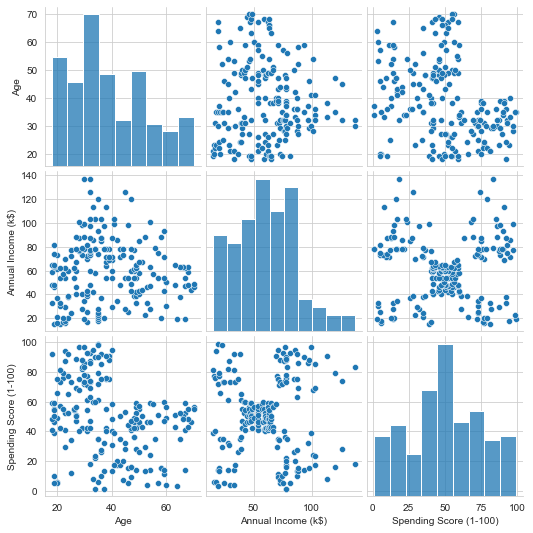

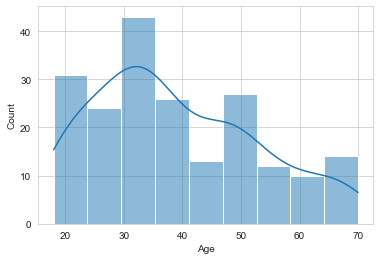

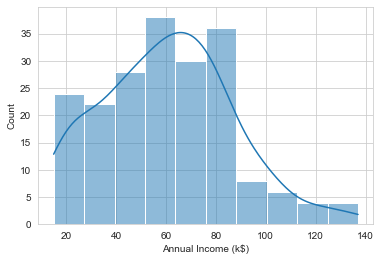

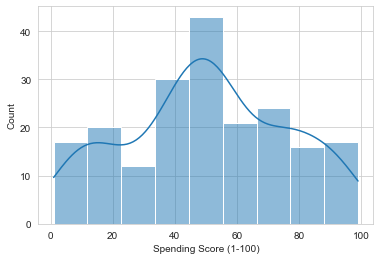

In [27]:
# Visualize the data
sns.set_style('whitegrid')
sns.pairplot(data, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()

sns.histplot(data, x='Age', kde=True)
plt.show()

sns.histplot(data, x='Annual Income (k$)', kde=True)
plt.show()

sns.histplot(data, x='Spending Score (1-100)', kde=True)
plt.show()

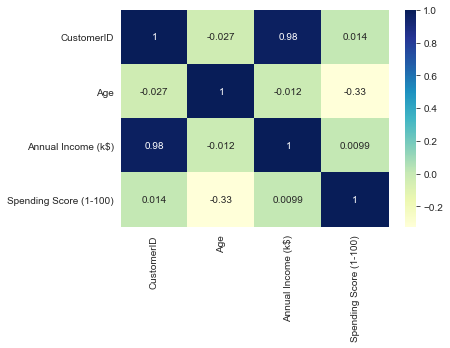

In [28]:
# Generate correlation matrix
corr_matrix = df.corr()
# Plot correlation heatmap
sns.set_style('white')
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

### Summary of Data Exploration
Based on the data exploration and visualization of the Mall Customer Segmentation Data, here are some of the key findings:

1. There are 200 customers in the dataset, with ages ranging from 18 to 70 years old.
2. The average annual income of customers is around 60,000 USD, with a standard deviation of 26,264 USD.
3. The histplot() function shows that the majority of customers are in their 20s and 30s, with the number of customers declining as age increases.
4. The histplot() function also shows that the majority of customers have an annual income between 40,000 and 80,000 USD, with a smaller number of customers having a higher income.
5. The histplot() function shows that the majority of customers have a spending score between 40 and 60, indicating that they spend an average amount in the mall.

### Model Building

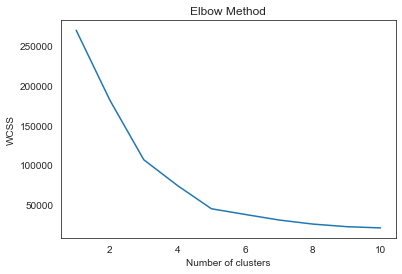

In [39]:
X = df.iloc[:, [3, 4]].values

# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=400, n_init=20, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- Number of clusters: 5 using the elbow method

In [40]:
# Applying k-means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

### Visualizing the Clusters

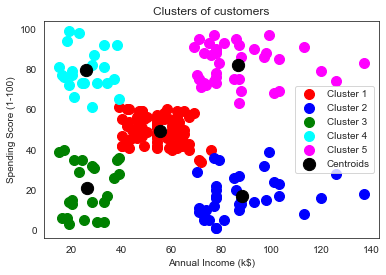

In [41]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Performance Evaluation
**Silhouette Score:**
The Silhouette Coefficient ranges from -1 to 1, with higher values indicating better clustering. A score close to 1 indicates that the data points in a cluster are close to each other and far from other clusters. A score close to -1 indicates that the data points in a cluster are far from each other and close to other clusters. A score close to 0 indicates that the data points in a cluster are close to the decision boundary between two clusters.

In [42]:
from sklearn.metrics import silhouette_score
silhouette_coefficient = silhouette_score(X, y_kmeans)
print('Silhouette Coefficient:', silhouette_coefficient)

Silhouette Coefficient: 0.553931997444648


### Conclusion
1. Based on the Silhouette Score, the model has a good performance. The model has a Silhouette Score of 0.55, which is close to 1. This indicates that the data points in each cluster are close to each other and far from other clusters.
2. The model has clustered the customers into 5 groups, with each group having a distinct spending behavior. The customers in each group can be targeted with different marketing strategies to maximize the mall's profit.
3. For example, the customers in Group 3 are the least profitable customers, as they have the lowest spending score and the lowest annual income. The mall should target these customers with special offers and discounts to increase their spending.